## Scraping Product Name and Price from the following product listing page on Flipkart

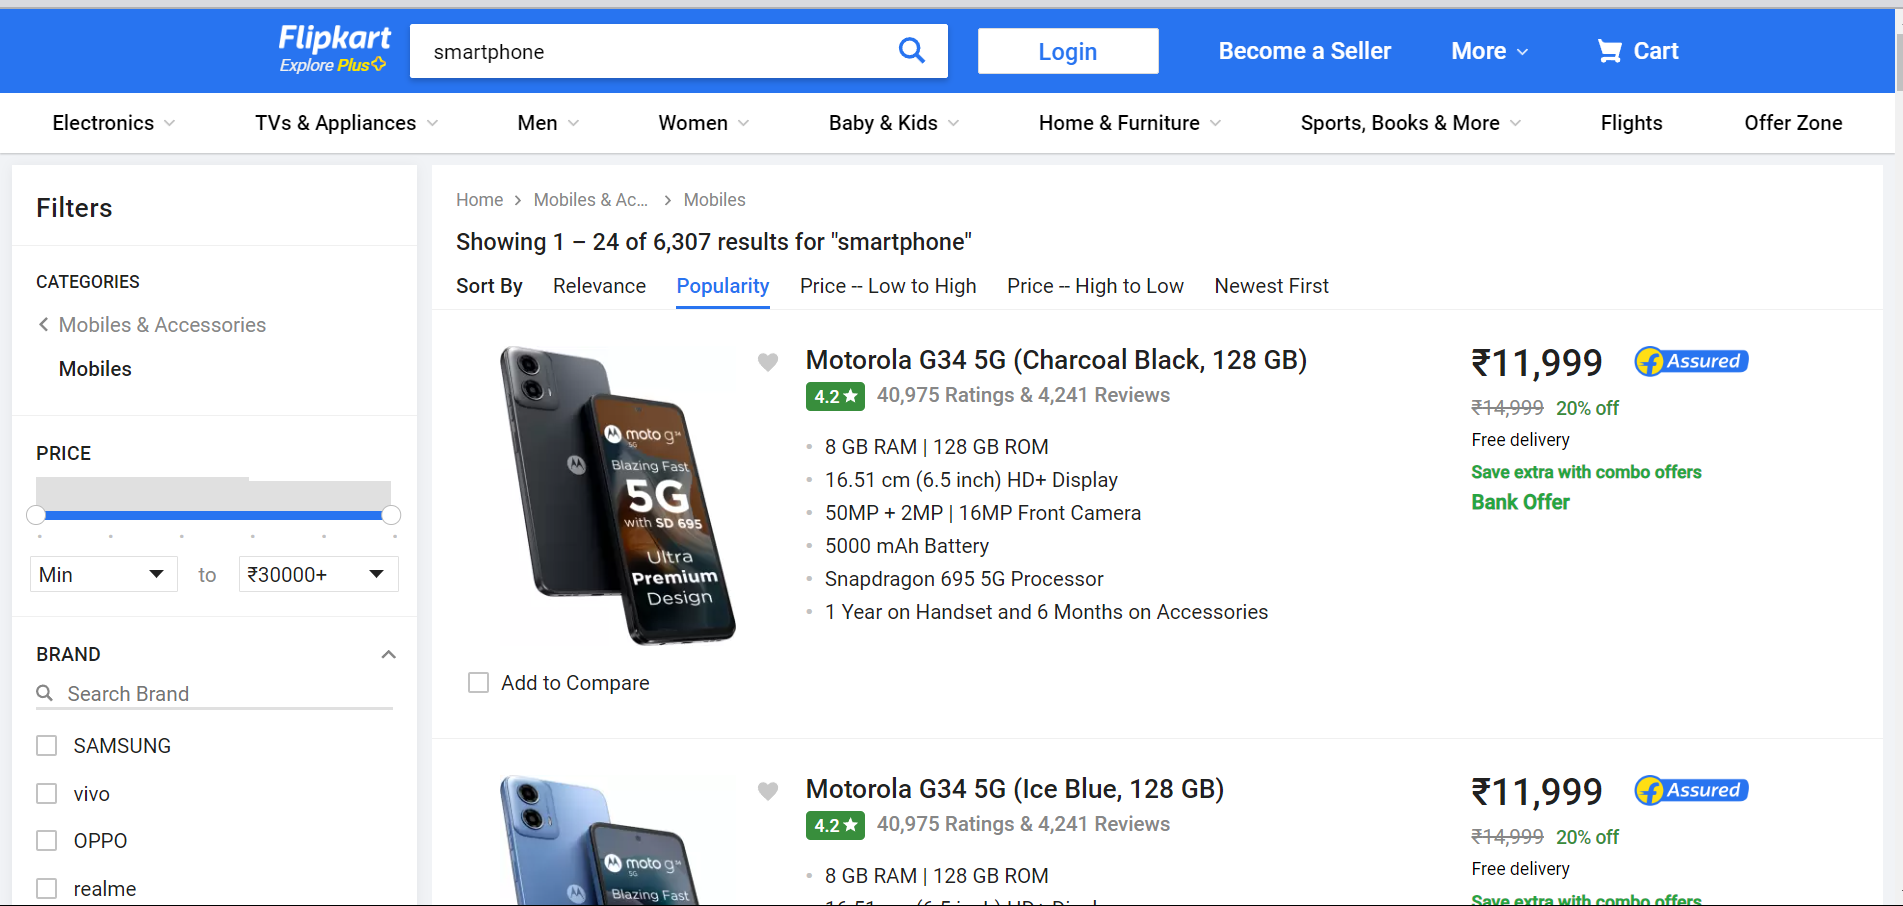

## Importing Libraries 

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from datetime import datetime
import csv
import time

## Creating a Web Scraping Function

In [ ]:
def check_price():  
    
    #Preparing DataFrame to add web scrapped data
    df = pd.DataFrame(columns = ['Date','Time','Product', 'Price'] )


    # Scraping the html code from FlipKart's Website 
    url = 'https://www.flipkart.com/search?q=smartphone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&sort=popularity'
    page = requests.get(url)
    soup = BeautifulSoup(page.text,'html')

    # Scraping Product Name 
    product_name = soup.find_all('div',class_="_4rR01T")

    # Cleaning Product Name data and adding to the previously created df,row by row
    length = 0
    for name in product_name:
        product = name.text.strip()
        df.loc[length,'Product'] = product
        length = length + 1

    # Scraping Product Price 
    prices = soup.find_all('div',class_="_30jeq3 _1_WHN1")

    # Cleaning Price data and adding to the previously created df, row by row
    length = 0
    for value in prices:
        price = value.text.strip()
        df.loc[length,'Price'] = price
        length = length + 1


    # Adding datestamp to the df
    date = datetime.now()
    # Converting into string to capture only the date values from date and time
    date = str(date) 
    date = date[:10]
    date
    
    #Adding date to the previoulsy created df, row by row
    length = 0
    while length <24: # Since only 24 rows will have listings
        df.loc[length,'Date'] = date
        length = length + 1

    # Adding timestamp to the df
    timestamp = datetime.now()
    # Converting into string to capture only the time values from date and time
    timestamp = str(timestamp)
    timestamp = timestamp[10:]
    timestamp

    #Adding time to the previoulsy created df, row by row    
    length = 0
    while length <24: # Since only 24 rows will have listings
        df.loc[length,'Time'] = timestamp
        length = length + 1


    #Converting df into a dictionary
    data = df.to_dict('records')

    #Saving data in a CSV file
    headers=['Date','Time','Product', 'Price']


#WHEN SAVING THE DATA FOR THE FIRST TIME - THIS CREATES A NEW FILE, ADDS HEADERS AND THEN SAVES THE SUBSEQUENT DATA
#     with open('Flipkart_Mobile_Prices.csv','w', encoding = 'UTF8', newline = '') as f:   ('w' stands for write)
#         c = csv.DictWriter(f, fieldnames = headers)
#         c.writeheader()
#         c.writerows(data)
        
#SUBSEQUENT SAVING OF DATA - THIS APPENDS SUBSEQUENT DATA THAT IS SCRAPPED ON THE ALREADY CREATED FILE
    with open('Flipkart_Mobile_Prices_Single_Page.csv','a', encoding = 'UTF8', newline = '') as f:   #('a' stands for append)
        c = csv.DictWriter(f, fieldnames = headers)
        c.writerows(data)


## Automating the code such that the Flipkart website is scraped every 30 minutes

In [ ]:
from datetime import datetime 
import time

# Runs function every 30 mins        
while(True):
    check_price()
    print(datetime.now() ,"run completed") # date and time and status of when the website is scraped
    time.sleep(1800)  #pauses the infinite group for 30 mins

## Checking the saved Dataframe - Flipkart_Mobile_Prices_Single_Page.csv

In [3]:
pd.set_option('display.max.rows',5448)
price_data = pd.read_csv(r"C:\Users\chels\ALex beginner\Python\Flipkart_Mobile_Prices_Single_Page.csv")
price_data

Date              Time  \
0     25-01-2024   18:26:35.979358   
1     25-01-2024   18:26:35.979358   
2     25-01-2024   18:26:35.979358   
3     25-01-2024   18:26:35.979358   
4     25-01-2024   18:26:35.979358   
5     25-01-2024   18:26:35.979358   
6     25-01-2024   18:26:35.979358   
7     25-01-2024   18:26:35.979358   
8     25-01-2024   18:26:35.979358   
9     25-01-2024   18:26:35.979358   
10    25-01-2024   18:26:35.979358   
11    25-01-2024   18:26:35.979358   
12    25-01-2024   18:26:35.979358   
13    25-01-2024   18:26:35.979358   
14    25-01-2024   18:26:35.979358   
15    25-01-2024   18:26:35.979358   
16    25-01-2024   18:26:35.979358   
17    25-01-2024   18:26:35.979358   
18    25-01-2024   18:26:35.979358   
19    25-01-2024   18:26:35.979358   
20    25-01-2024   18:26:35.979358   
21    25-01-2024   18:26:35.979358   
22    25-01-2024   18:26:35.979358   
23    25-01-2024   18:26:35.979358   
24    25-01-2024   19:01:10.553914   
25    25-01-2024   19:01:10.553914   
26    25-01-2024   19:01:10.553914   
27    25-01-2024   19:01:10.553914   
28    25-01-2024   19:01:10.553914   
29    25-01-2024   19:01:10.553914   
30    25-01-2024   19:01:10.553914   
31    25-01-2024   19:01:10.553914   
32    25-01-2024   19:01:10.553914   
33    25-01-2024   19:01:10.553914   
34    25-01-2024   19:01:10.553914   
35    25-01-2024   19:01:10.553914   
36    25-01-2024   19:01:10.553914   
37    25-01-2024   19:01:10.553914   
38    25-01-2024   19:01:10.553914   
39    25-01-2024   19:01:10.553914   
40    25-01-2024   19:01:10.553914   
41    25-01-2024   19:01:10.553914   
42    25-01-2024   19:01:10.553914   
43    25-01-2024   19:01:10.553914   
44    25-01-2024   19:01:10.553914   
45    25-01-2024   19:01:10.553914   
46    25-01-2024   19:01:10.553914   
47    25-01-2024   19:01:10.553914   
48    25-01-2024   19:37:15.300370   
49    25-01-2024   19:37:15.300370   
50    25-01-2024   19:37:15.300370   
51    25-01-2024   19:37:15.300370   
52    25-01-2024   19:37:15.300370   
53    25-01-2024   19:37:15.300370   
54    25-01-2024   19:37:15.300370   
55    25-01-2024   19:37:15.300370   
56    25-01-2024   19:37:15.300370   
57    25-01-2024   19:37:15.300370   
58    25-01-2024   19:37:15.300370   
59    25-01-2024   19:37:15.300370   
60    25-01-2024   19:37:15.300370   
61    25-01-2024   19:37:15.300370   
62    25-01-2024   19:37:15.300370   
63    25-01-2024   19:37:15.300370   
64    25-01-2024   19:37:15.300370   
65    25-01-2024   19:37:15.300370   
66    25-01-2024   19:37:15.300370   
67    25-01-2024   19:37:15.300370   
68    25-01-2024   19:37:15.300370   
69    25-01-2024   19:37:15.300370   
70    25-01-2024   19:37:15.300370   
71    25-01-2024   19:37:15.300370   
72    25-01-2024   20:11:19.524380   
73    25-01-2024   20:11:19.524380   
74    25-01-2024   20:11:19.524380   
75    25-01-2024   20:11:19.524380   
76    25-01-2024   20:11:19.524380   
77    25-01-2024   20:11:19.524380   
78    25-01-2024   20:11:19.524380   
79    25-01-2024   20:11:19.524380   
80    25-01-2024   20:11:19.524380   
81    25-01-2024   20:11:19.524380   
82    25-01-2024   20:11:19.524380   
83    25-01-2024   20:11:19.524380   
84    25-01-2024   20:11:19.524380   
85    25-01-2024   20:11:19.524380   
86    25-01-2024   20:11:19.524380   
87    25-01-2024   20:11:19.524380   
88    25-01-2024   20:11:19.524380   
89    25-01-2024   20:11:19.524380   
90    25-01-2024   20:11:19.524380   
91    25-01-2024   20:11:19.524380   
92    25-01-2024   20:11:19.524380   
93    25-01-2024   20:11:19.524380   
94    25-01-2024   20:11:19.524380   
95    25-01-2024   20:11:19.524380   
96    2024-01-25   20:16:18.774797   
97    2024-01-25   20:16:18.774797   
98    2024-01-25   20:16:18.774797   
99    2024-01-25   20:16:18.774797   
100   2024-01-25   20:16:18.774797   
101   2024-01-25   20:16:18.774797   
102   2024-01-25   20:16:18.774797   
103   2024-01-25   20:16:18.774797   
104   2024-01-25   20:

##  

#### In the above funtion, we have scrapped only a single page of product listing. Next, we are creating a function that scraps 4 pages of listings

## Creating a Web Scraping Function

In [ ]:
# Preparing DataFrame
df = pd.DataFrame(columns = ['Date','Time','Product', 'Price'] )

# Webscraping function
def check_price_2():
    url = 'https://www.flipkart.com/search?q=smartphone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&sort=popularity'
    page = requests.get(url)
    soup = BeautifulSoup(page.text,'html')

    # Scraping the link adresses of first 4 pages from the botton of the 1st page listing where all page numbers are mentioned
    raw_links = soup.find_all('a',class_="ge-49M")[0:4]

    # Converting the link addresses into strings and adding it to a list
    links = [str(r) for r in raw_links]

    #Cleaning the links such that they contain domain names and '&'
    links[0] = links[0][32:175].replace("&amp;",'&').replace('/','https://www.flipkart.com/')
    links[1] = links[1][24:167].replace("&amp;",'&').replace('/','https://www.flipkart.com/')
    links[2] = links[2][24:167].replace("&amp;",'&').replace('/','https://www.flipkart.com/')
    links[3] = links[3][24:167].replace("&amp;",'&').replace('/','https://www.flipkart.com/')


    # Retriving the html code for each page from the list of links
    for x in links[0:4]:
        url = x
        page = requests.get(url)
        soup = BeautifulSoup(page.text,'html')
        print(soup)

        # Scraping Product Name 
        product_name = soup.find_all('div',class_="_4rR01T")

        # Cleaning Product Name data and adding to the previously created df, row by row
        length = 0
        for p in product_name:
            product = p.text.strip()
            df.loc[length,'Product'] = product
            length = length + 1

        # Scraping Product Price 
        prices = soup.find_all('div',class_="_30jeq3 _1_WHN1")

        # Cleaning Price data and adding to the previously created df, row by row
        length = 0
        for c in prices:
            price = c.text.strip()
            df.loc[length,'Price'] = price
            length = length + 1


        # Adding datestamp to the df
        date = datetime.now()
        # Converting into string to capture only the date values from date and time
        date = str(date)
        date = date[:10]
        date
        
        # Adding date to the previoulsy created df, row by row
        length = 0
        while length <24:
            df.loc[length,'Date'] = date
            length = length + 1

            
        # Adding timestamp to the df
        timestamp = datetime.now()
        # Converting into string to capture only the time values from date and time
        timestamp = str(timestamp)
        timestamp = timestamp[10:]
        timestamp
        
        # Adding date to the previoulsy created df, row by row
        length = 0
        while length <24:
            df.loc[length,'Time'] = timestamp
            length = length + 1


        # Converting df into a dictionary
        data = df.to_dict('records')

        # Saving data in a CSV file
        headers=['Date','Time','Product', 'Price']
        
# WHEN SAVING THE DATA FOR THE FIRST TIME - THIS CREATES A NEW FILE, ADDS HEADERS AND THEN SAVES THE SUBSEQUENT DATA
#         with open('multiple.csv','w', encoding = 'UTF8', newline = '') as f: ('w' stands for write)
#             c = csv.DictWriter(f, fieldnames = headers)
#             c.writeheader()
#             c.writerows(data)
    
# SUBSEQUENT SAVING OF DATA - THIS APPENDS SUBSEQUENT DATA THAT IS SCRAPPED ON THE ALREADY CREATED FILE
        with open('Flipkart_Mobile_Prices_Multiple_Page.csv','a', encoding = 'UTF8', newline = '') as f: #('a' stands for append)
            c = csv.DictWriter(f, fieldnames = headers)
            c.writerows(data)



## Automating the code such that the Flipkart website is scraped every 30 minutes

In [ ]:
from datetime import datetime 
import time
  
# Runs function every 30 mins            
while(True):
    check_price_2()
    print(datetime.now() ,"run completed") # date and time and status of when the website is scraped
    time.sleep(1800) #pauses the infinite group for 30 mins

## Checking the saved Dataframe - Flipkart_Mobile_Prices_Multiple_Page.csv.csv

In [5]:
pd.set_option('display.max.rows',12672)
price_data_2 = pd.read_csv(r"C:\Users\chels\ALex beginner\Python\Flipkart_Mobile_Prices_Multiple_Page.csv")
price_data_2

Date              Time  \
0      26-01-2024   00:06:28.005257   
1      26-01-2024   00:06:28.005257   
2      26-01-2024   00:06:28.005257   
3      26-01-2024   00:06:28.005257   
4      26-01-2024   00:06:28.005257   
5      26-01-2024   00:06:28.005257   
6      26-01-2024   00:06:28.005257   
7      26-01-2024   00:06:28.005257   
8      26-01-2024   00:06:28.005257   
9      26-01-2024   00:06:28.005257   
10     26-01-2024   00:06:28.005257   
11     26-01-2024   00:06:28.005257   
12     26-01-2024   00:06:28.005257   
13     26-01-2024   00:06:28.005257   
14     26-01-2024   00:06:28.005257   
15     26-01-2024   00:06:28.005257   
16     26-01-2024   00:06:28.005257   
17     26-01-2024   00:06:28.005257   
18     26-01-2024   00:06:28.005257   
19     26-01-2024   00:06:28.005257   
20     26-01-2024   00:06:28.005257   
21     26-01-2024   00:06:28.005257   
22     26-01-2024   00:06:28.005257   
23     26-01-2024   00:06:28.005257   
24     26-01-2024   00:06:28.966957   
25     26-01-2024   00:06:28.966957   
26     26-01-2024   00:06:28.966957   
27     26-01-2024   00:06:28.966957   
28     26-01-2024   00:06:28.966957   
29     26-01-2024   00:06:28.966957   
30     26-01-2024   00:06:28.966957   
31     26-01-2024   00:06:28.966957   
32     26-01-2024   00:06:28.966957   
33     26-01-2024   00:06:28.966957   
34     26-01-2024   00:06:28.966957   
35     26-01-2024   00:06:28.966957   
36     26-01-2024   00:06:28.966957   
37     26-01-2024   00:06:28.966957   
38     26-01-2024   00:06:28.966957   
39     26-01-2024   00:06:28.966957   
40     26-01-2024   00:06:28.966957   
41     26-01-2024   00:06:28.966957   
42     26-01-2024   00:06:28.966957   
43     26-01-2024   00:06:28.966957   
44     26-01-2024   00:06:28.966957   
45     26-01-2024   00:06:28.966957   
46     26-01-2024   00:06:28.966957   
47     26-01-2024   00:06:28.966957   
48     26-01-2024   00:06:29.582888   
49     26-01-2024   00:06:29.582888   
50     26-01-2024   00:06:29.582888   
51     26-01-2024   00:06:29.582888   
52     26-01-2024   00:06:29.582888   
53     26-01-2024   00:06:29.582888   
54     26-01-2024   00:06:29.582888   
55     26-01-2024   00:06:29.582888   
56     26-01-2024   00:06:29.582888   
57     26-01-2024   00:06:29.582888   
58     26-01-2024   00:06:29.582888   
59     26-01-2024   00:06:29.582888   
60     26-01-2024   00:06:29.582888   
61     26-01-2024   00:06:29.582888   
62     26-01-2024   00:06:29.582888   
63     26-01-2024   00:06:29.582888   
64     26-01-2024   00:06:29.582888   
65     26-01-2024   00:06:29.582888   
66     26-01-2024   00:06:29.582888   
67     26-01-2024   00:06:29.582888   
68     26-01-2024   00:06:29.582888   
69     26-01-2024   00:06:29.582888   
70     26-01-2024   00:06:29.582888   
71     26-01-2024   00:06:29.582888   
72     26-01-2024   00:06:30.223590   
73     26-01-2024   00:06:30.223590   
74     26-01-2024   00:06:30.223590   
75     26-01-2024   00:06:30.223590   
76     26-01-2024   00:06:30.223590   
77     26-01-2024   00:06:30.223590   
78     26-01-2024   00:06:30.223590   
79     26-01-2024   00:06:30.223590   
80     26-01-2024   00:06:30.223590   
81     26-01-2024   00:06:30.223590   
82     26-01-2024   00:06:30.223590   
83     26-01-2024   00:06:30.223590   
84     26-01-2024   00:06:30.223590   
85     26-01-2024   00:06:30.223590   
86     26-01-2024   00:06:30.223590   
87     26-01-2024   00:06:30.223590   
88     26-01-2024   00:06:30.223590   
89     26-01-2024   00:06:30.223590   
90     26-01-2024   00:06:30.223590   
91     26-01-2024   00:06:30.223590   
92     26-01-2024   00:06:30.223590   
93     26-01-2024   00:06:30.223590   
94     26-01-2024   00:06:30.223590   
95     26-01-2024   00:06:30.223590   
96     2024-01-26   00:46:47.306980   
97     2024-01-26   00:46:47.306980   
98     2024-01-26   00:46:47.306980   
99     2024-01-26   00:46:47.306980   
100    2024-01-26   00:46:47.306980   
101    2024-01-26   00:46:47.306980